# 主成分分析基本原理

## 主成分分析基本思想

主成分分析（principal components anaylysis）主要是利用降维的思想，在损失很少信息的前提下减少数据的维度，通常将转化生成的综合指标称为主成分。每个主成分都是原始变量的线性组合，且各个主成分之间互不相关。

## 主成分分析的基本理论

数据 $X_{n\times p}$ 表示有 $n$ 个数据，每个数据有 $p$ 个维度，对 $X$ 进行与 $U^T_{p\times p}$ 相乘进行线性变换，可以形成新的综合变量用 $Y_{n \times p}$ 表示即：
$$ Y = X \cdot U^T \tag{1} $$

其中 $U$ 为 $X$ 标准化后的 $XX^T$ 的特征向量，或者为 $X$ 协方差矩阵 $\Sigma$ 的特征向量， $\lambda$ 为特征值，表示 $Y$ 的每个维度的方差， 每个特征值占所有特征值总和的比例为该特征值的解释力度,记为 $a_k$：
$$ X^{'} = \frac{X - \mu_X}{\sigma_X}  \tag{2}$$
$$ X^{'}X^{'T}= \Sigma = U diag(\lambda) U^T \tag{3} $$
$$ a_k = \frac{\lambda_k}{\lambda_1 + \lambda_2 + \dots + \lambda_p} \tag{4} $$

我们一般关心累计贡献度：
$$ \frac{\sum_{i=1}^{m}\lambda_i}{\sum_{i=1}^{p}\lambda_i} \tag{5} $$

根据累计贡献度的大小，我们可以从 $U$ 选取合适的 $m$ 个指标作为 $X$ 线性变换的矩阵，这样就实现了降维：
$$ Y_{n \times m} = X_{n \times p} U^T_{p \times m} \tag{6} $$

- $U$ 是一个模长为为 1 的矩阵，即 $u_i^Tu_i = 1$
- $Y$ 的各个分量之间互不相关 

- 因子载荷量 $A$：$A = U * \sqrt{diag(\lambda)} $
- 评价函数 $F$: $F = Y*a_k $

# Python 主成分分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 例5-2 评价各省市经济效益

In [2]:
data = pd.read_excel('./data/主成分分析.xlsx', sheetname='5-2')
data.head()

,100固定资产原值实现值（%）,100元固定资产原值实现利税（%）,100元资金实现利税（%）,100元工业总产值实现利税（%）,100元销售收入实现利税（%）,每吨标准煤实现工业产值（元）,每千瓦时电力实现工业产值（元）,全员劳动生产率（元/人.年）,100元流动资金实现产值（元）
北京（1）,119.29,30.98,29.92,25.97,15.48,2178.00,3.41,21006.0,296.7
天津（2）,143.98,31.59,30.21,21.94,12.29,2852.00,4.29,20254.0,363.1
河北（3）,94.80,17.20,17.95,18.14,9.37,1167.00,2.03,12607.0,322.2
山西（4）,65.80,11.08,11.06,12.15,16.84,8.82,1.65,10166.0,284.7
内蒙（5）,54.79,9.24,9.54,16.86,6.27,894.00,1.80,7564.0,225.4


In [3]:
### 标准化
X = (data - data.mean()) / data.std()

## 导入主成分库，并先选择所有主成分
from sklearn.decomposition import PCA
pca = PCA(n_components = X.shape[1])
## 训练数据
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
## 展示方差解释力度
pd.DataFrame({'方差': pca.explained_variance_,
              '贡献度':pca.explained_variance_ratio_,
             '累计贡献度':pca.explained_variance_ratio_.cumsum()})

,方差,累计贡献度,贡献度
0,6.149885,0.683321,0.683321
1,1.472892,0.846975,0.163655
2,0.697420,0.924466,0.077491
3,0.317825,0.959780,0.035314
4,0.190044,0.980896,0.021116
5,0.116045,0.993790,0.012894
6,0.029118,0.997025,0.003235
7,0.024324,0.999728,0.002703
8,0.002448,1.000000,0.000272


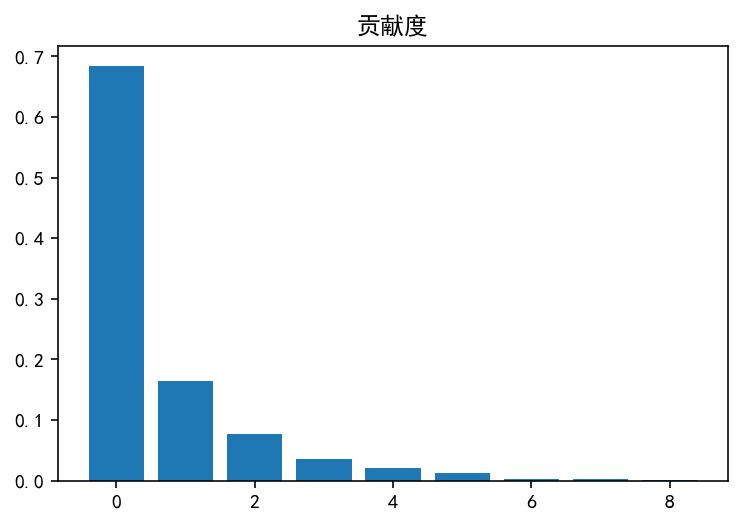

In [5]:
plt.bar(range(9), pca.explained_variance_ratio_)
plt.title('贡献度');

In [6]:
## 选择前两个作为主成分
pca.n_components = 2
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
## 主成分系数：
pd.DataFrame(pca.components_, columns=data.columns)

,100固定资产原值实现值（%）,100元固定资产原值实现利税（%）,100元资金实现利税（%）,100元工业总产值实现利税（%）,100元销售收入实现利税（%）,每吨标准煤实现工业产值（元）,每千瓦时电力实现工业产值（元）,全员劳动生产率（元/人.年）,100元流动资金实现产值（元）
0,0.375559,0.393396,0.375256,0.093534,0.174559,0.372149,0.361616,0.351316,0.362594
1,0.259512,-0.134374,-0.265294,-0.711329,-0.491327,0.164956,0.225403,0.052364,0.126751


In [8]:
## 主成分
y = pd.DataFrame(pca.transform(X), index=data.index)
y

,0,1
北京（1）,2.816238,-2.425742
天津（2）,3.735832,-0.536483
河北（3）,-0.486831,0.097747
山西（4）,-2.021997,-0.384570
内蒙（5）,-2.976298,0.732496
辽宁（6）,-0.418013,-1.267647
吉林（7）,-1.613553,0.809633
黑龙江（8）,-1.041542,-0.692269
上海（9）,7.037722,-1.378583
江苏（10）,3.944277,2.806737


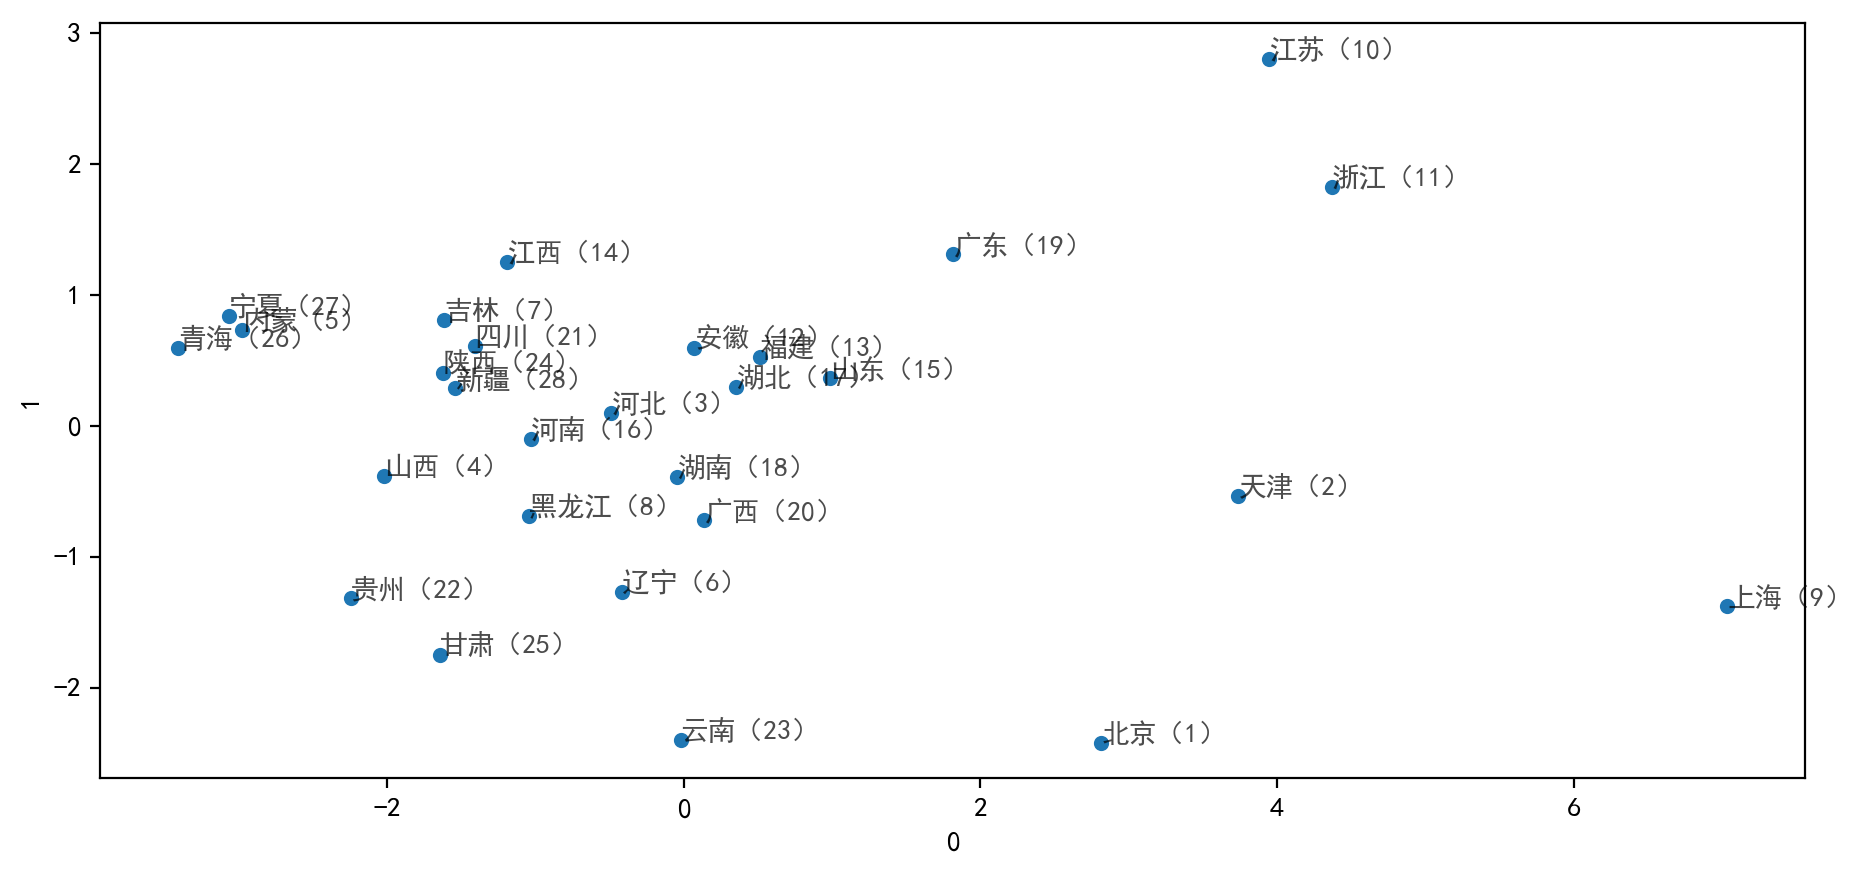

In [9]:
plt.figure(dpi=100, figsize=(11,5))
ax = plt.subplot(111)
y.plot.scatter(0,1, ax=ax, alpha=1)

for i in range(y.shape[0]):
    ax.annotate(data.index[i], (y.iloc[i,0], y.iloc[i,1]),alpha=0.7)

## 例5-3 水泥企业经济效益综合评价

In [10]:
data_2 = pd.read_excel('./data/主成分分析.xlsx', sheetname='5-3')
data_2.set_index('厂家编号及指标', inplace=True)
## 将 '流动资金周转天数' 和 '万元产值能耗' 取倒数
data_2['流动资金周转天数'] = 1 / data_2['流动资金周转天数']
data_2['万元产值能耗'] = 1 / data_2['万元产值能耗']
data_2.head()

,固定资产利税率,资金利税率,销售收入利税率,资金利润率,固定资产产值率,流动资金周转天数,万元产值能耗,全员劳动生产率
厂家编号及指标,,,,,,,,
琉璃河,16.68,26.75,31.84,18.40,53.25,0.018182,0.034686,1.75
邯郸,19.70,27.56,32.94,19.20,59.82,0.018182,0.030377,2.87
大同,15.20,23.40,32.98,16.24,46.78,0.015385,0.023987,1.53
哈尔滨,7.29,8.97,21.30,4.76,34.39,0.016129,0.025458,1.63
华新,29.45,56.49,40.74,43.68,75.32,0.014493,0.037481,2.14


In [11]:
## 标准化 
X_2 = (data_2 - data_2.mean()) / data_2.std()
X_2.head()

,固定资产利税率,资金利税率,销售收入利税率,资金利润率,固定资产产值率,流动资金周转天数,万元产值能耗,全员劳动生产率
厂家编号及指标,,,,,,,,
琉璃河,-0.376748,-0.357946,-0.113559,-0.366694,-0.038794,1.193347,1.426821,-0.277122
邯郸,0.088158,-0.293876,0.050803,-0.287323,0.356157,1.193347,0.289035,2.253119
大同,-0.604583,-0.622925,0.056779,-0.580995,-0.427733,-0.373281,-1.398099,-0.774133
哈尔滨,-1.822267,-1.764312,-1.688443,-1.719968,-1.172548,0.043644,-1.009542,-0.548219
华新,1.589096,1.994436,1.216277,2.141428,1.287927,-0.872786,2.164810,0.603944


In [12]:
## 主成分分析
pca_2 = PCA(n_components=X_2.shape[1])
pca_2.fit(X_2)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
## 展示方差解释力度
pd.DataFrame({'方差': pca_2.explained_variance_,
              '贡献度':pca_2.explained_variance_ratio_,
             '累计贡献度':pca_2.explained_variance_ratio_.cumsum()})

,方差,累计贡献度,贡献度
0,4.860635,0.607579,0.607579
1,1.269174,0.766226,0.158647
2,0.837004,0.870852,0.104626
3,0.517097,0.935489,0.064637
4,0.378175,0.982761,0.047272
5,0.115468,0.997194,0.014434
6,0.021128,0.999835,0.002641
7,0.001318,1.000000,0.000165


In [14]:
## 选择前3个主成分
pca_2.n_components = 3
pca_2.fit(X_2)

## 主成分系数矩阵
pd.DataFrame(pca_2.components_, columns = data_2.columns)

,固定资产利税率,资金利税率,销售收入利税率,资金利润率,固定资产产值率,流动资金周转天数,万元产值能耗,全员劳动生产率
0,0.434067,0.407766,0.390911,0.420727,0.356854,0.191631,0.290517,0.258889
1,-0.016487,-0.351123,0.072241,-0.311078,0.000221,0.686453,-0.069141,0.546310
2,-0.261567,0.040663,-0.369589,-0.041125,0.198903,0.377485,0.701934,-0.341867


In [15]:
## 得到第一个主成分， 并排名
y_2 = pca_2.transform(X_2)
index = y_2[:,0].argsort()[::-1].argsort() ## argsort() 返回的是从小到大值对应的序号，所有用两次返回对应大小排序值
pd.DataFrame({'y1': y_2[:,0], '名次': index+1}, index=data_2.index)

,y1,名次
厂家编号及指标,,
琉璃河,0.049449,7
邯郸,0.840463,5
大同,-1.569438,12
哈尔滨,-3.739361,15
华新,3.957065,1
湘乡,3.889455,2
柳州,1.611045,4
峨嵋,-2.804575,14
耀县,-0.474240,9
